In [1]:
# Northeastern University
# EECE5639 Computer Vision

# Project 1
import cv2 
import numpy as np 
import os
from matplotlib import pyplot as plt
from IPython.display import clear_output
from time import sleep
import shutil

In [2]:
# i. Read in a sequence of image frames and make them grayscale.
Office_path = "./Office/"
RedChair_path = "./RedChair"
# Office
office_files = [filename for filename in sorted(os.listdir(Office_path)) if os.path.isfile(os.path.join(Office_path, filename))]

office_images = []    
for i in range(0, len(office_files)): 
    img = cv2.imread(os.path.join(Office_path, office_files[i]))
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGRA2GRAY)
    office_images.append(gray_img)

office_images = np.array(office_images)
print(office_images.shape)
# RedChair
redchair_files = [filename for filename in sorted(os.listdir(RedChair_path)) if os.path.isfile(os.path.join(RedChair_path, filename))]

redchair_images_original = []
redchair_images = []
for i in range(0, len(redchair_files)): 
    img = cv2.imread(os.path.join(RedChair_path, redchair_files[i]))
    redchair_images_original.append(img)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGRA2GRAY)
    redchair_images.append(gray_img)

redchair_images_original = np.array(redchair_images_original)
redchair_images = [redchair_images[0]]+redchair_images
redchair_images = np.array(redchair_images)

print(redchair_images.shape)

(1070, 240, 320)
(354, 240, 320)


In [20]:
def derivative_gaussian_1d(tsigma, size):
    # 1D     Gaussian filter
    # sigma: standard deviation of the Gaussian filter
    # size: size of the Gaussian filter
    x = np.arange(-size // 2 + 1., size // 2 + 1.)
    g = -x * np.exp(-0.5 * (x / tsigma) ** 2)
    g = g / (tsigma**2)
    return g


def gaussian_2d(sigma, size):
    # 2D Gaussian filter
    # sigma: standard deviation of the Gaussian filter
    # size: size of the Gaussian filter
    x, y = np.meshgrid(np.arange(-size // 2 + 1., size // 2 + 1.),
                       np.arange(-size // 2 + 1., size // 2 + 1.))
    g = np.exp(-0.5 * ((x**2 + y**2) / sigma**2))
    return g / g.sum()


def convolve(img, filter):
    # Convolution
    # img: input image
    # filter: convolution filter
    if len(filter.shape) == 1:
        filter = filter.reshape(-1, 1, 1)
        return cv2.filter2D(img, -1, filter)
        # return np.convolve(img, filter, mode='same')
    else:
        return cv2.filter2D(img, -1, filter)


def threshold(masks, min_thres=0, max_thres=500):
    # Thresholding
    # masks: input masks
    # min_thres: minimum threshold
    # max_thres: maximum threshold
    mask = []
    for i in range(len(masks)):
        img = masks[i]
        img = img.astype(np.uint8)

        th, dst = cv2.threshold(img, min_thres, max_thres, cv2.THRESH_BINARY)
        mask.append(dst)
    return np.array(mask)


def wirte(img, path, name):
    # wirte images to path
    # img: input image
    # path: output path
    for i in range(len(img)):
        filename = "{}{}-{}.jpg".format(path, name, i)
        cv2.imwrite(filename, img[i])


def write_combine(original, mask, shift, path, name):
    # wirte images to path
    # img: input image
    # path: output path
    print(len(original))
    for i in range(len(mask)-1):
        filename = "{}{}-{}.jpg".format(path, name, i)
        img = np.multiply(original[i], mask[i+shift])
        
        cv2.imwrite(filename, img)


In [16]:
shutil.rmtree('pics')

In [5]:
naive_filter = 0.5 * np.array([-1.,0.,1.])
gauss1d_sigma1_size3 = derivative_gaussian_1d(1, 3)
gauss1d_sigma1_size5 = derivative_gaussian_1d(1, 5)
gauss1d_sigma14_size5 = derivative_gaussian_1d(1.4, 5)
gauss1d_sigma3_size3 = derivative_gaussian_1d(3, 3)


box3 = np.ones([3,3])/9
box5 = np.ones([5,5])/25
gauss2d_1 = gaussian_2d(1, 3)
gauss2d_1_9 = gaussian_2d(1, 9)

gauss2d_2 = gaussian_2d(2, 3)
gauss2d_5 = gaussian_2d(5, 3)

# print the shape of the filter
# print('naive_filter:', naive_filter.shape)
# print('gauss1d_sigma1_size5:', gauss1d_sigma1_size5.shape)
# print('gauss1d_sigma1_size7:', gauss1d_sigma1_size7.shape)
# print('gauss1d_sigma1_size9:', gauss1d_sigma1_size9.shape)
# print('box3:', box3.shape)
# print('box5:', box5.shape)
# print('gauss1:', gauss2d_1.shape)
# print('gauss14:', gauss2d_14.shape)

# print('gauss2d_1', gauss2d_1)
# print('gauss2d_14', gauss2d_14)

In [19]:
if not os.path.exists('pics'):
    os.mkdir('pics')
else:
    shutil.rmtree('pics')
    os.mkdir('pics')

path = os.getcwd() +'/pics/'
# naive for red chair
red_chair_naive = convolve(redchair_images, naive_filter)
red_chair_naive = threshold(red_chair_naive, 15, 255)

# wirte(red_chair_naive, path, 'red_chair_naive')
# wirte(redchair_images, path, 'red_chair_original')
write_combine(redchair_images, red_chair_naive, 1, path, 'red_chair_naive_combine')
# 1D derivative of Gaussian for red chair
# RC for red chair

red_chair_gauss_1d_1_3 = convolve(redchair_images, gauss1d_sigma1_size3)
red_chair_gauss_1d_1_3 = threshold(red_chair_gauss_1d_1_3, 15, 255)

# wirte(red_chair_gauss_1d_1_3, path, 'RC_gauss_1d_1_3')
write_combine(redchair_images, red_chair_gauss_1d_1_3, -1, path, 'red_chair_gauss_1d_1_3_combine')

red_chair_gauss_1d_3_3 = convolve(redchair_images, gauss1d_sigma3_size3)
red_chair_gauss_1d_3_3 = threshold(red_chair_gauss_1d_3_3, 7, 255)

# wirte(red_chair_gauss_1d_3_3, path, 'RC_gauss_1d_3_3')
write_combine(redchair_images, red_chair_gauss_1d_3_3, -1, path, 'red_chair_gauss_1d_3_3_combine')
# sigma=3 size=3 is good but need lower sigma

red_chair_gauss_1d_1_5 = convolve(redchair_images, gauss1d_sigma1_size5)
red_chair_gauss_1d_1_5 = threshold(red_chair_gauss_1d_1_5, 15, 255)

# wirte(red_chair_gauss_1d_1_5, path, 'RC_gauss_1d_1_5')
write_combine(redchair_images, red_chair_gauss_1d_1_5, -1, path, 'red_chair_gauss_1d_1_5_combine')
# sigma=1 size=5 is bad two people are detected

# red_chair_gauss_1d_14_5 = convolve(redchair_images, gauss1d_sigma14_size5)
# red_chair_gauss_1d_14_5 = threshold(red_chair_gauss_1d_14_5, 15, 255)

# # wirte(red_chair_gauss_1d_14_5, path, 'RC_gauss_1d_14_5')
# write_combine(redchair_images, red_chair_gauss_1d_14_5, path, 'red_chair_gauss_1d_14_5_combine')


# the result of naive filter is similar to sigma 1 size 3 guassian filter

# 1d derivative of Gaussian for red chair
# larger size filter will detect two people which is not what we want 
# larger size and sigma will reduce the noise more

354
[[196 198 203 ... 180 178 182]
 [197 198 203 ... 184 183 187]
 [199 200 204 ... 186 186 190]
 ...
 [114 117 117 ... 108 110 109]
 [115 117 112 ... 109 109 108]
 [115 117 108 ... 107 105 105]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
354
[[196 198 203 ... 180 178 182]
 [197 198 203 ... 184 183 187]
 [199 200 204 ... 186 186 190]
 ...
 [114 117 117 ... 108 110 109]
 [115 117 112 ... 109 109 108]
 [115 117 108 ... 107 105 105]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
354
[[196 198 203 ... 180 178 182]
 [197 198 203 ... 184 183 187]
 [199 200 204 ... 186 186 190]
 ...
 [114 117 117 ... 108 110 109]
 [115 117 112 ... 109 109 108]
 [115 117 108 ... 107 105 105]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
354
[[196 198 203 ... 180 178 182]
 [197 198 203 ...

## Smooting first with box or gaussian filter

In [41]:
shutil.rmtree('pics')
if not os.path.exists('pics'):
    os.mkdir('pics')
else:
    shutil.rmtree('pics')
    os.mkdir('pics')

path = os.getcwd() +'/pics/'

In [47]:
# smooting first
red_chair_box_3 = convolve(redchair_images, box3)
red_chair_box_3 = convolve(red_chair_box_3, naive_filter)
red_chair_box_3 = threshold(red_chair_box_3, 10, 255)

# wirte(red_chair_box_3, path, 'RC_box_3')
write_combine(redchair_images, red_chair_box_3, 1, path, 'red_chair_box_3_combine')

# red_chair_box_5 = convolve(redchair_images, box5)
# red_chair_box_5 = convolve(red_chair_box_5, naive_filter)
# red_chair_box_5 = threshold(red_chair_box_5, 1, 255)

# # wirte(red_chair_box_5, path, 'RC_box_5')
# write_combine(redchair_images, red_chair_box_5, 0, path, 'red_chair_box_5_combine')

red_chair_box_3 = convolve(redchair_images, box3)
red_chair_box_3 = convolve(red_chair_box_3, gauss1d_sigma1_size3)
red_chair_box_3 = threshold(red_chair_box_3, 10, 255)

# wirte(red_chair_box_3, path, 'RC_box_3_guass')
write_combine(redchair_images, red_chair_box_3, -1, path, 'red_chair_box_3_guass_combine')

red_chair_box_5 = convolve(redchair_images, box5)
red_chair_box_5 = convolve(red_chair_box_5, gauss1d_sigma1_size3)
red_chair_box_5 = threshold(red_chair_box_5, 10, 255)

# wirte(red_chair_box_5, path, 'RC_box_5_guass')
write_combine(redchair_images, red_chair_box_5, -2, path, 'red_chair_box_5_guass_combine')

## with 1d gaussian filter to get the derivative the noise is reduced
## biger box size will reduce the noise more


red_chair_gauss_2d_1_3 = convolve(redchair_images, gauss2d_1)
red_chair_gauss_2d_1_3 = convolve(red_chair_gauss_2d_1_3, naive_filter)
red_chair_gauss_2d_1_3 = threshold(red_chair_gauss_2d_1_3, 10, 255)

# wirte(red_chair_gauss_2d_1_3, path, 'RC_gauss_2d_1_3')
write_combine(redchair_images, red_chair_gauss_2d_1_3, 1, path, 'red_chair_gauss_2d_1_3_combine')

red_chair_gauss_2d_1_3 = convolve(redchair_images, gauss2d_1)
red_chair_gauss_2d_1_3 = convolve(red_chair_gauss_2d_1_3, gauss1d_sigma1_size3)
red_chair_gauss_2d_1_3 = threshold(red_chair_gauss_2d_1_3, 10, 255)

# wirte(red_chair_gauss_2d_1_3, path, 'RC_gauss_2d_1_3')
write_combine(redchair_images, red_chair_gauss_2d_1_3, -1, path, 'red_chair_gauss_2d_1_3_combine_gauss')

red_chair_gauss_2d_2_3 = convolve(redchair_images, gauss2d_2)
red_chair_gauss_2d_2_3 = convolve(red_chair_gauss_2d_2_3, naive_filter)
red_chair_gauss_2d_2_3 = threshold(red_chair_gauss_2d_2_3, 10, 255)

# wirte(red_chair_gauss_2d_2_3, path, 'RC_gauss_2d_2_3')
write_combine(redchair_images, red_chair_gauss_2d_2_3, 1, path, 'red_chair_gauss_2d_2_3_combine')


red_chair_gauss_2d_1_9 = convolve(redchair_images, gauss2d_1_9)
red_chair_gauss_2d_1_9 = convolve(red_chair_gauss_2d_1_9, naive_filter)
red_chair_gauss_2d_1_9 = threshold(red_chair_gauss_2d_1_9, 10, 255)

# wirte(red_chair_gauss_2d_1_9, path, 'RC_gauss_2d_1_9')
write_combine(redchair_images, red_chair_gauss_2d_1_9, 1, path, 'red_chair_gauss_2d_1_9_combine')


red_chair_gauss_2d_5_3 = convolve(redchair_images, gauss2d_5)
red_chair_gauss_2d_5_3 = convolve(red_chair_gauss_2d_5_3, naive_filter)
red_chair_gauss_2d_5_3 = threshold(red_chair_gauss_2d_5_3, 10, 255)

# wirte(red_chair_gauss_2d_5_3, path, 'RC_gauss_2d_5_3')
write_combine(redchair_images, red_chair_gauss_2d_5_3, 1, path, 'red_chair_gauss_2d_5_3_combine')


354
354
354
354
354
354
354
354


## Find the threshold

7


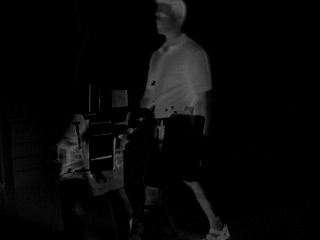

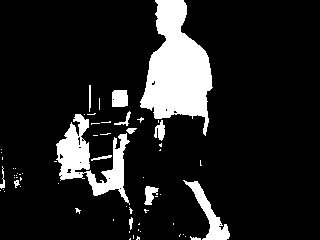

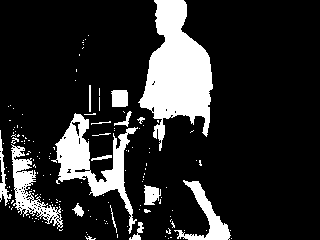

In [26]:
# find the threshold
def select_thresholds(filtered_derivative_image):
    # Calculate thresholds
    stddev = []
    for i in range(len(filtered_derivative_image)):
        stddev_i = cv2.meanStdDev(filtered_derivative_image[i])
        stddev.append(stddev_i)
    threshold = 3 * np.mean(stddev)
    return int(threshold)

# print(select_thresholds(redchair_images))
red_chair_naive = convolve(redchair_images, naive_filter)
# red_chair_naive = threshold(red_chair_naive, 15, 255)
selected_threshold = select_thresholds(red_chair_naive)
print(select_thresholds(red_chair_naive))
from IPython.display import display
from PIL import Image
# print(select_threshold(redchair_images))
display(Image.fromarray(red_chair_naive[217]))
red_chair_naive_pre_threshold = threshold(red_chair_naive, 15, 255)
display(Image.fromarray(red_chair_naive_pre_threshold[217]))
red_chair_naive_af_threshold = threshold(red_chair_naive, selected_threshold, 255)
display(Image.fromarray(red_chair_naive_af_threshold[217]))




In [ ]:
# main

# ii. As enough frames are available, apply a 1-D differential operator at each 
# pixel to compute a temporal derivative.

#images = office_images
images = redchair_images

#play_frames(images)
print(images.shape)

# compute temporal derivative
operator_1d = np.array([-1, 0, 1])
kernel2 = np.vstack((np.vstack(([0,0,0], operator_1d)), [0,0,0]))
print(kernel2)

td = []
for i in range(1, len(images)):
    diff = cv2.absdiff(images[i], images[i-1])
    td.append(diff)

    #frames1 = [images[i-1], images[i], images[i]]
    #img1 = np.tensordot(frames1, operator_1d, axes=(0,0)) # tensor product
    #img2 = cv2.filter2D(src=images[i], ddepth=-1, kernel=kernel2)
    #cv2_imshow(diff)
    #cv2_imshow(img1)
    #cv2_imshow(img2)
    #td.append(img2)
    #break
td = np.array(td)

if not os.path.exists('pics'):
    os.mkdir('pics')
else:
    shutil.rmtree('pics')
    os.mkdir('pics')

path = os.getcwd() +'/pics/'
for i in range(len(td)):
   filename = "{}diff-{}.jpg".format(path,i)
   cv2.imwrite(filename, td[i])

#play_frames(td)
print(td.shape)

#-------------------------------------------------------------------------------
# iii. Threshold the absolute values of the derivatives to create a 0 and 1 
# mask of the moving objects.
thresh = 25
maxValue = 255

mask = []
for i in range(len(td)):
    img = td[i]
    src = img.astype(np.uint8)
    th, dst = cv2.threshold(src, thresh, maxValue, cv2.THRESH_BINARY)
    mask.append(dst)
    filename = "{}mask-{}.jpg".format(path,i)
    cv2.imwrite(filename, mask[i])
mask = np.array(mask)

#play_frames(mask)
print(mask.shape)

#-------------------------------------------------------------------------------
# iv. Combine the mask with the original frame to display the results.

output = []
for i in range(1, len(images)):
    img = np.multiply(images[i], mask[i-1])
    output.append(img)
output = np.array(output)

for i in range(len(output)):
   filename = "{}out-{}.jpg".format(path,i)
   cv2.imwrite(filename, output[i])

#play_frames(output)
print(output.shape)

#import shutil
#output_filename = 'p1-test'
#dir_name = path
#print(dir_name)
#shutil.make_archive(output_filename, 'zip', dir_name)